# Demo Qiskit
*by Ana Neri (Univ. Minho)*

Install Qiskit following the instruction in [the link](https://qiskit.org/documentation/install.html). 

You can also create an IBM Quantum Experience Account, go to Quantum Lab (with the jupyter logo), and add a New Notebook. This way you can work directly in the IBM Q platform, and evoid any installation issue.

In [1]:
from qiskit.tools.jupyter import *
%qiskit_version_table

## What is Qiskit?

Qiskit is an open-source framework to develop quantum computation smoothly. The Qiskit construction allows for research, education, and business, though it is still giving the initial steps.

## What is Qiskit in detail?

* **Terra** is the central foundation. Similar to the Qiskit composer, this module also allows for the composition of quantum programs and their execution. In other words, this module is what we need to start our experiments. We can handle it to define our quantum programs at a level of circuits and pulses, optimize them to the pretended backend, and coordinate the executions in the remote-access backends.
* **Aer** is the first attempt to improve on Terra, specifically improve de simulations. The simulations on Are are faster and allow to test circuits through simulated noise.
* **Aqua** comprises a library of quantum algorithms. Its purpose is to make quantum computation more accessible to people in the fields of chemistry, AI, optimization, and finance applications. This section of Qiskit is crucial to show the advantages of quantum computation to industry. 
* **Ignis** is the most recent addition to Qiskit and aims to deal with quantum errors.  You have heard that quantum computation may be relevant in some fields as soon as the hardware surpasses the quantum noise. This module enables mitigation, characterization, and verification.

## Installation  

1. Create an account in [IBM Q Experience](https://quantum-computing.ibm.com/). You need an account to use IBM Q Quantum computers. This account can be used to run your programs if the local installation fails.
2. Download [Anaconda](https://www.anaconda.com/) and execute the sh file.
3. Run:

\$ conda create -n name_of_my_env python=3 

\$ source activate name_of_my_env 

\$ pip3 install qiskit

These instructions work in Linux. Check [Qiskit Documentation](https://qiskit.org/documentation/install.html) for more information.

## How to write a quantum program? - (Terra)

A quantum program is a circuit with quantum gates and registers.

The quantum circuits are independet of the quantum computer we select. 

We need to create a space to save information about your qubit state. Those are **registers**.

We will need a set of **quantum registers** to save the quantum state and a set of **classical registers** where we save information after measuring the qubits.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3,'c')

The next step is to apply these registers to a **quantum circuit**.

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(qr,cr)

Now we have a quantum circuit with the name circuit.

It would be nice to see it!

Allow the matplotlib to run with the following line:

In [4]:
%matplotlib inline

Now when we want to see our circuit we only need to use the function **draw()**.

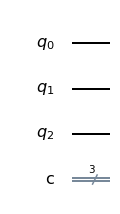

In [5]:
qc.draw()

By default, the initial state of the qubit is $|0 \rangle $ also known as the *ground state*.

We have a quantum circuit but this quantum circuit does nothing. Let us add some gates!

Despite we can create circuits with a wide variaty of gates (e.g. $X$, $Y$, $Z$, $H$, $S$, $T$, $...$), the only gates in IBM Q devices are: $\{id, u1, u2, u3, cx\}$.

See more about the quantum gates in [here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html).

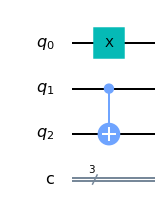

In [6]:
#{circuit name}.{gate}({register}[{number of register}], ...)

# single qubit gate
qc.x(qr[0])

# mutiqubit gate
qc.cx(qr[1],qr[2])

qc.draw()

We also need to do measures:

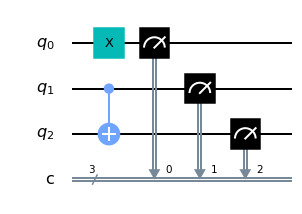

In [7]:
qc.measure(qr,cr)

qc.draw()

## How to simulate a quantum program? - (Aer)

### Quantum state

Let's start to see the **quantum state**.

In [8]:
from qiskit import execute, Aer

In [9]:
backend_vector= Aer.get_backend("statevector_simulator")

In [10]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')
qc = QuantumCircuit(qr,cr)

In [11]:
result = execute(qc, backend_vector).result()
qstate = result.get_statevector(qc)

In [12]:
print(qstate)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [13]:
from qiskit.visualization import *

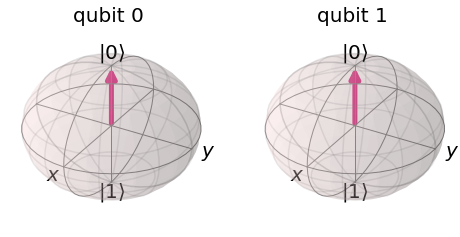

In [14]:
plot_bloch_multivector(qstate)

Let us add **entanglement**:

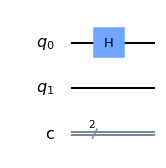

In [15]:
qc.h(qr[0])
qc.draw()

In [16]:
result = execute(qc, backend_vector).result()
qstate= result.get_statevector(qc)
print(qstate)

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


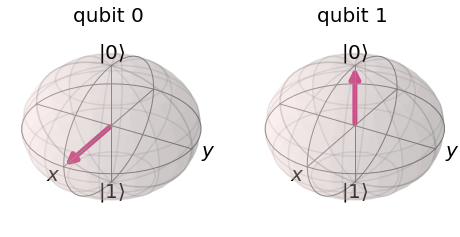

In [17]:
plot_bloch_multivector(qstate)

### Circuit matrix

In [18]:
backend_unitary = Aer.get_backend('unitary_simulator')

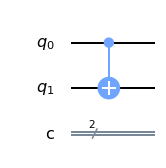

In [19]:
qc_aux = QuantumCircuit(qr,cr)
qc_aux.cx(qr[0],qr[1])
qc_aux.draw()

In [20]:
job = execute(qc_aux, backend_unitary)
result = job.result()
unitary_matrix = result.get_unitary(qc_aux, decimals=3)

# Show the results
print(unitary_matrix)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [21]:
# in this case you can use:
print(unitary_matrix.real)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


This is different from the expected matrix:

$$\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}$$

In most of the literature $q_0$ is the most significant qubit:

|control|target|control|target|
|-|-|-|-|
|input $q_0$|input $q_1$|output $q_0$|output $q_1$|
|0|0|0|0|
|0|1|0|1|
|**1**|**0**|**1**|**1**|
|**1**|**1**|**1**|**0**|

In Qiskit $q_0$ is the least significant qubit:

|target|control|target|control|
|-|-|-|-|
|input $q_1$|input $q_0$|output $q_1$|output $q_0$|
|0|0|0|0|
|**0**|**1**|**1**|**1**|
|1|0|1|1|
|**1**|**1**|**0**|**1**|

Matrix change in a similar way as the truth table.

### Merging Circuits

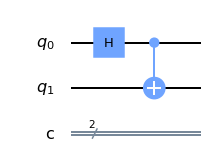

In [22]:
qc = qc + qc_aux
qc.draw()

In [23]:
result = execute(qc, backend_vector).result()
qstate= result.get_statevector(qc)
print(qstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Using the Bloch sphere right now, is not advisable since it only represents the state of a single qubit.

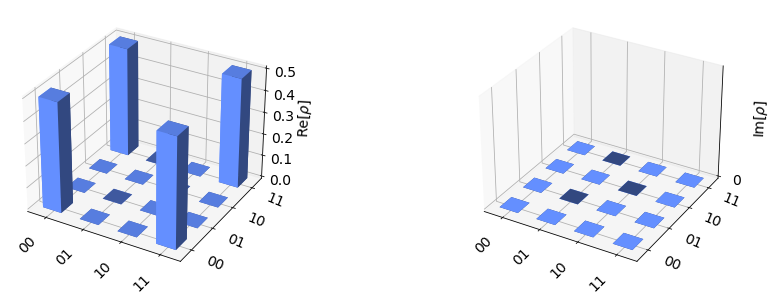

In [24]:
plot_state_city(qstate)

That is completely theoretical. Let us do the same kind of computation that **can run on a quantum computer**.  

### Simulate the quantum computer

First, add measure gate.

In [25]:
# use the index of qr to define the position of the measure gate 
# add use the index of cr to define the position to save the value
qc.measure(qr,cr)

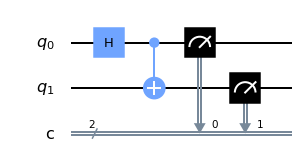

In [26]:
qc.draw()

In [27]:
backend = Aer.get_backend("qasm_simulator")

In [28]:
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts(qc)

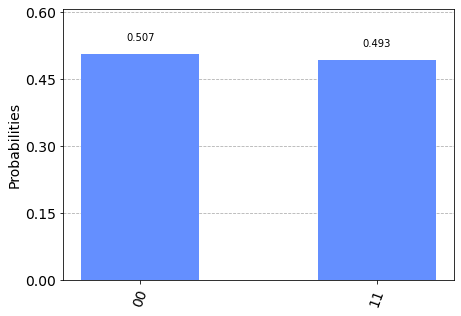

In [29]:
plot_histogram(counts)

## There is a lot to explore

There a fun function that allow you to see how the state of qubits is changing in the bloch sphere!

In [30]:
circuit=QuantumCircuit(1)
circuit.h(0)
circuit.z(0)
circuit.h(0)

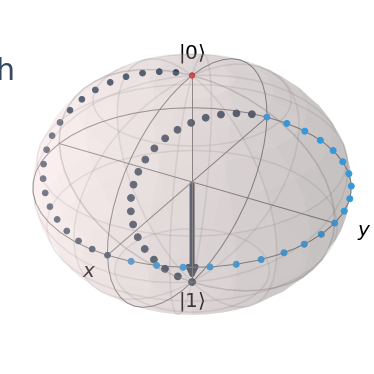

In [31]:
visualize_transition(circuit, fpg=20, spg=1, trace=True)

## How to run quantum circuits in quantum computers? - (ibmq provider) 

In [32]:
from qiskit import IBMQ

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [33]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

Look for more information about your backends:

In [34]:
%qiskit_backend_overview

Select one of the backends available. In this case, we selected the backend:'ibmqx2'.

In [35]:
from qiskit.tools.monitor import backend_monitor

backend = provider.get_backend('ibmqx2')

backend_monitor(backend)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 5
    backend_version: 2.1.0
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    max_experiments: 75
    memory: True
    coupling_map: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]
    meas_map: [[0, 1, 2, 3, 4]]
    quantum_volume: 8
    url: None
    online_date: 2017-01-24 05:00:00+00:00
    max_shots: 8192
    open_pulse: False
    description: 5 qubit device
    conditional: False
    sample_name: sparrow
    allow_object_storage: True
    allow_q_object: True
    credits_required: True
    backend_name: ibmqx2
    n_registers: 1

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.28293 GHz / 65.66646 us / 27.00769 us / 0 / 0.00112 / 0.00224 / 0
    Q1 / 5.24763 GHz / 53.47829 u

In [36]:
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

Don't get lost about the circuit your have sent to the device. The next line of code show a list of the your jobs in the backends and their state.

In [37]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [38]:
# Number of shots to run the program (experiment); maximum is 8192 shots.
shots = 1024       
job_exp = execute(qc, backend, shots = shots)

# save the job ID so you can retrieve old executions later.
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

Use the following line when you need to retrive the job information that has been executed previously.

In [39]:
job_get=backend.retrieve_job('5f772dea9b0c460019dbdd54')

In [40]:
result_real = job_get.result(timeout=3600, wait=5)
counts_real = result_real.get_counts()

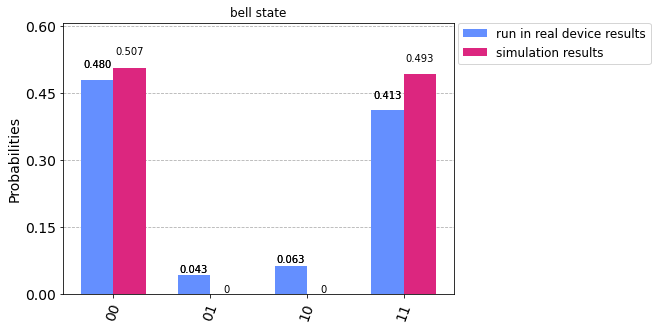

In [41]:
title = 'bell state'
legend = ['run in real device results', 'simulation results']

plot_histogram([counts_real, counts], legend = legend, title= title)